In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Thermobar as pt


In [25]:
BlatterIn=pd.read_excel('Blatter_2023_merged.xlsx', sheet_name="Phases", index_col=False)
BlatterIn.head()

# Phases
Cpx_N701=BlatterIn.loc[BlatterIn['Phase']=="Cpx"]
Opx_N701=BlatterIn.loc[BlatterIn['Phase']=="Opx"]
Plag_N701=BlatterIn.loc[BlatterIn['Phase']=="Plg"]
Amp_N701=BlatterIn.loc[BlatterIn['Phase']=="Amph"]


# Glasses
GlassesIn=pd.read_excel('Blatter_2023_merged.xlsx', sheet_name='Glasses', index_col=False)
# Exp cond
ExpCond_B2023=pd.read_excel('Blatter_2023_merged.xlsx', sheet_name="Exp_Cond", index_col=False)
## Combine Glasses and Exp cond
Glass_N701=pd.merge(GlassesIn, ExpCond_B2023, how="left", on="Experiment")

In [26]:
Glass_N701.head()

,Starting_Comp,Warnminorquenchng,Experiment_with_notes_x,Experiment,GPa_x,P_kbar,T_C_x,N_Liq,SiO2,(1s),...,ebubbles,H2Ovaporwt.%,CO2vaporwt.%,∆ReReO2,Unnamed: 31,Cpx0liq,Opx0liq,Amp0liq,Gnt0liq,Plg0liq
0,01-SB872CascadeBasalt,garnet_seeds,j3040+gnt,3040+gnt,1.0,10.0,1000,16,61.79,0.64,...,amphP,36.000,64.000,0.292256,NaN,0.37,0.32,0.26,0.63,1.37
1,01-SB872CascadeBasalt,FeLoss,h2766,2766,1.2,NaN,1275,27,49.84,0.54,...,N,5.114,94.886,0.000000,NaN,0.00,0.00,0.00,0.00,0.00
2,01-SB872CascadeBasalt,FeLoss,h2695,2695,1.2,NaN,1250,28,51.88,0.31,...,N,7.426,92.574,0.000000,NaN,0.47,0.35,0.00,0.00,0.00
3,01-SB872CascadeBasalt,FeLoss,h2691,2691,1.2,NaN,1200,30,50.93,0.39,...,N,7.884,92.116,0.050612,NaN,0.46,0.37,0.00,0.00,0.00
4,01-SB872CascadeBasalt,NaN,2708,2708,1.2,NaN,1150,15,51.61,0.32,...,N,6.367,93.633,0.127338,NaN,0.49,0.43,0.00,0.00,0.00


In [27]:
Glass_N701 = Glass_N701.replace(to_replace='[A-Za-z]+', value=1, regex=True)
filt=Glass_N701.fillna(0)



Weber_out=pd.DataFrame(data={'ID': filt['Experiment'],
                             'Eruption': 0,
                             'Unit': 0,
                             'Type': 0,
                             'Reference': 0,
                             'Note': 0,
                             'ol': 0,
                             'opx': filt['opx'],
                             'cpx': filt['acpx'],
                             'plag': filt['plg'],
                             'amph': filt['amph'],
                             'ox': filt['ilm']+filt['crsp']+filt['timt']+filt['alsp'],
                             'bt': 0,
                             'ksp': 0,
                             'gt':filt['gnt'],
                             'qz': filt['qtz'],
                             'SiO2.n.': filt['SiO2'],
                            'TiO2.n.': filt['TiO2'],
                            'Al2O3.n.': filt['Al2O3'],
                             'FeO.n.': filt['FeOT'],
                            'MgO.n.': filt['MgO'],
                             'CaO.n.': filt['CaO'],
                            'Na2O.n.': filt['Na2O'],
                             'K2O.n.': filt['K2O']
                             
                             })



In [28]:
Weber_out

,ID,Eruption,Unit,Type,Reference,Note,ol,opx,cpx,plag,...,gt,qz,SiO2.n.,TiO2.n.,Al2O3.n.,FeO.n.,MgO.n.,CaO.n.,Na2O.n.,K2O.n.
0,1,0,0,0,0,0,0,14,19,24,...,1,0,61.79,0.73,19.66,5.34,1.53,5.22,3.30,1.60
1,2766,0,0,0,0,0,0,0,0,0,...,0,0,49.84,1.35,17.20,8.44,9.29,10.06,2.81,0.52
2,2695,0,0,0,0,0,0,1,2,0,...,0,0,51.88,1.24,16.84,8.22,8.46,9.59,2.89,0.49
3,2691,0,0,0,0,0,0,3,17,0,...,0,0,50.93,1.55,19.50,8.31,6.12,8.64,3.92,0.71
4,2708,0,0,0,0,0,0,4,30,0,...,0,0,51.61,1.33,20.24,8.11,5.81,7.82,4.04,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2945,0,0,0,0,0,0,0,0,10,...,2,0,69.24,0.38,17.13,2.60,0.68,3.48,4.66,1.72
72,2925,0,0,0,0,0,0,0,0,0,...,0,0,65.32,0.52,18.13,3.57,1.43,4.69,4.73,1.34
73,2870,0,0,0,0,0,0,0,0,0,...,0,0,67.20,0.37,18.09,2.86,0.83,4.10,4.83,1.33
74,2888,0,0,0,0,0,0,0,0,2,...,0,0,69.12,0.22,18.22,1.96,0.53,3.59,4.70,1.37


In [30]:
Weber_out.loc[Weber_out['ol'] > 0, 'ol'] = 1
Weber_out.loc[Weber_out['opx'] > 0, 'opx'] = 1
Weber_out.loc[Weber_out['cpx'] > 0, 'cpx'] = 1
Weber_out.loc[Weber_out['plag'] > 0, 'plag'] = 1
Weber_out.loc[Weber_out['amph'] > 0, 'amph'] = 1
Weber_out.loc[Weber_out['ox'] > 0, 'ox'] = 1
Weber_out.loc[Weber_out['gt'] > 0, 'gt'] = 1
Weber_out.loc[Weber_out['qz'] > 0, 'qz'] = 1

In [31]:
Weber_out.to_clipboard(excel=True)

In [43]:
df=pd.read_excel('Blatter_Weber.xlsx')

Text(4.444444444444452, 0.5, 'Calc H2O (with phases, no filt)')

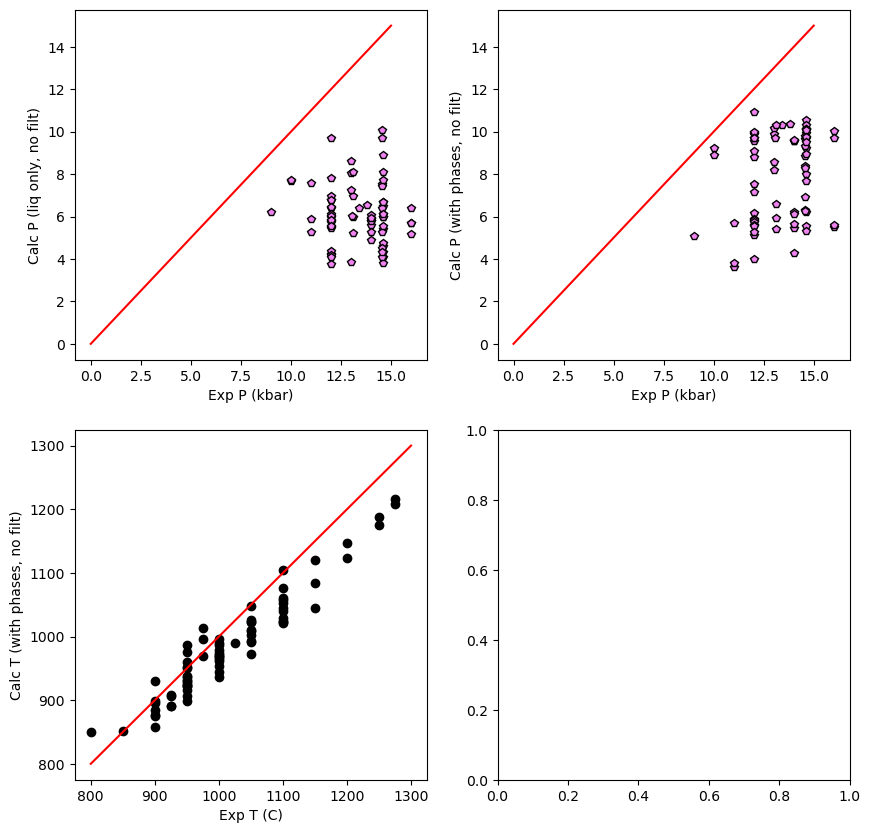

In [49]:
fig, ((ax0, ax1), (ax2, ax4)) = plt.subplots(2, 2, figsize=(10,10))      

ax0.plot(Glass_N701['GPa_x']*10, 
df['calc.data.predictions.P_kbar_liq_only'],
'pk', mfc='violet')
ax1.set_xlabel('Exp P (kbar)')

ax1.plot(Glass_N701['GPa_x']*10, 
df['calc.data.predictions.P_kbar'],
'pk', mfc='violet')
ax0.set_xlabel('Exp P (kbar)')
ax1.set_xlabel('Exp P (kbar)')

ax2.plot(Glass_N701['T_C_x'], 
df['calc.data.predictions.T_C'],
'ok')
ax2.set_xlabel('Exp T (C)')

ax3.plot(Glass_N701['H2O_FTIR'].loc[Glass_N701['H2O_FTIR']>0], 
df['calc.data.predictions.H2O_Liq'].loc[Glass_N701['H2O_FTIR']>0],
'ok')
ax3.set_xlabel('H2O_Liq')

ax0.plot([0, 15], [0, 15], '-r')
ax1.plot([0, 15], [0, 15], '-r')
ax2.plot([800, 1300], [800, 1300], '-r')
ax3.plot([0, 10], [0, 10], '-r')

ax1.set_ylabel('Calc P (with phases, no filt)')
ax0.set_ylabel('Calc P (liq only, no filt)')
ax2.set_ylabel('Calc T (with phases, no filt)')
ax3.set_ylabel('Calc H2O (with phases, no filt)')

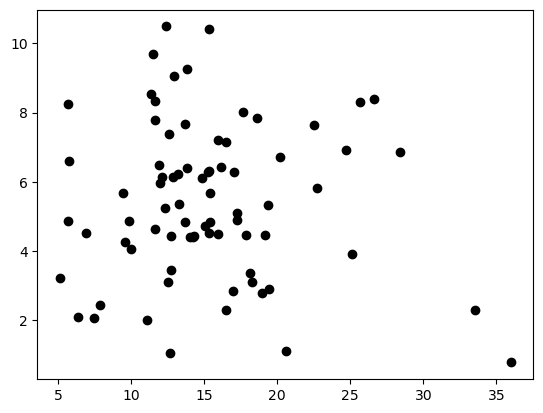

In [50]:
plt.plot(Glass_N701['H2Ovaporwt.%'],
    Glass_N701['GPa_x']*10-df['calc.data.predictions.P_kbar'], 'ok')